In [1]:
import json
with open('lmg_pretrained_pipeline_reg.json', 'r') as f:
    data = json.load(f)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean, stdev

reg_weights = sorted([i['parameters']['reg_weights'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict])]
    return result

result = []
for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        last_epoch = trial[1]
        datas.append(last_epoch['data'])
    result.append({'bce_weight': bce, 'statistics': statistics_per_key(datas)})
    


sensitivity
[0.4558745324611664, 0.4952153166135152, 0.5159489611784617, 0.5268474171559016, 0.6065922478834788]
[0.04644865359604195, 0.056727659261238024, 0.06287007101299857, 0.06303911135945667, 0.04472160212824635]
specificity
[0.9851032296816508, 0.9819670716921488, 0.9808781246344248, 0.9771031240622202, 0.9622499048709869]
[0.003762332517403244, 0.005864623837365916, 0.005520339373033276, 0.007082337859009283, 0.006664577577376411]
accuracy
[0.9576931496461233, 0.9567569692929586, 0.956798275311788, 0.9537832538286845, 0.9438295066356659]
[0.0016499308585142532, 0.0029987485598349352, 0.0025114834420211663, 0.003972112525020571, 0.004111653277544226]
precision
[0.6306289633115133, 0.6102189819018046, 0.6034547885258993, 0.5664676129817963, 0.470459242661794]
[0.04092282923743018, 0.06447059649980004, 0.052015764832300936, 0.05924820899674056, 0.028787692068282477]
mcc
[0.5136656032240392, 0.5250385732987297, 0.5333827730526811, 0.5196196345818674, 0.5043529779019673]
[0.0167288

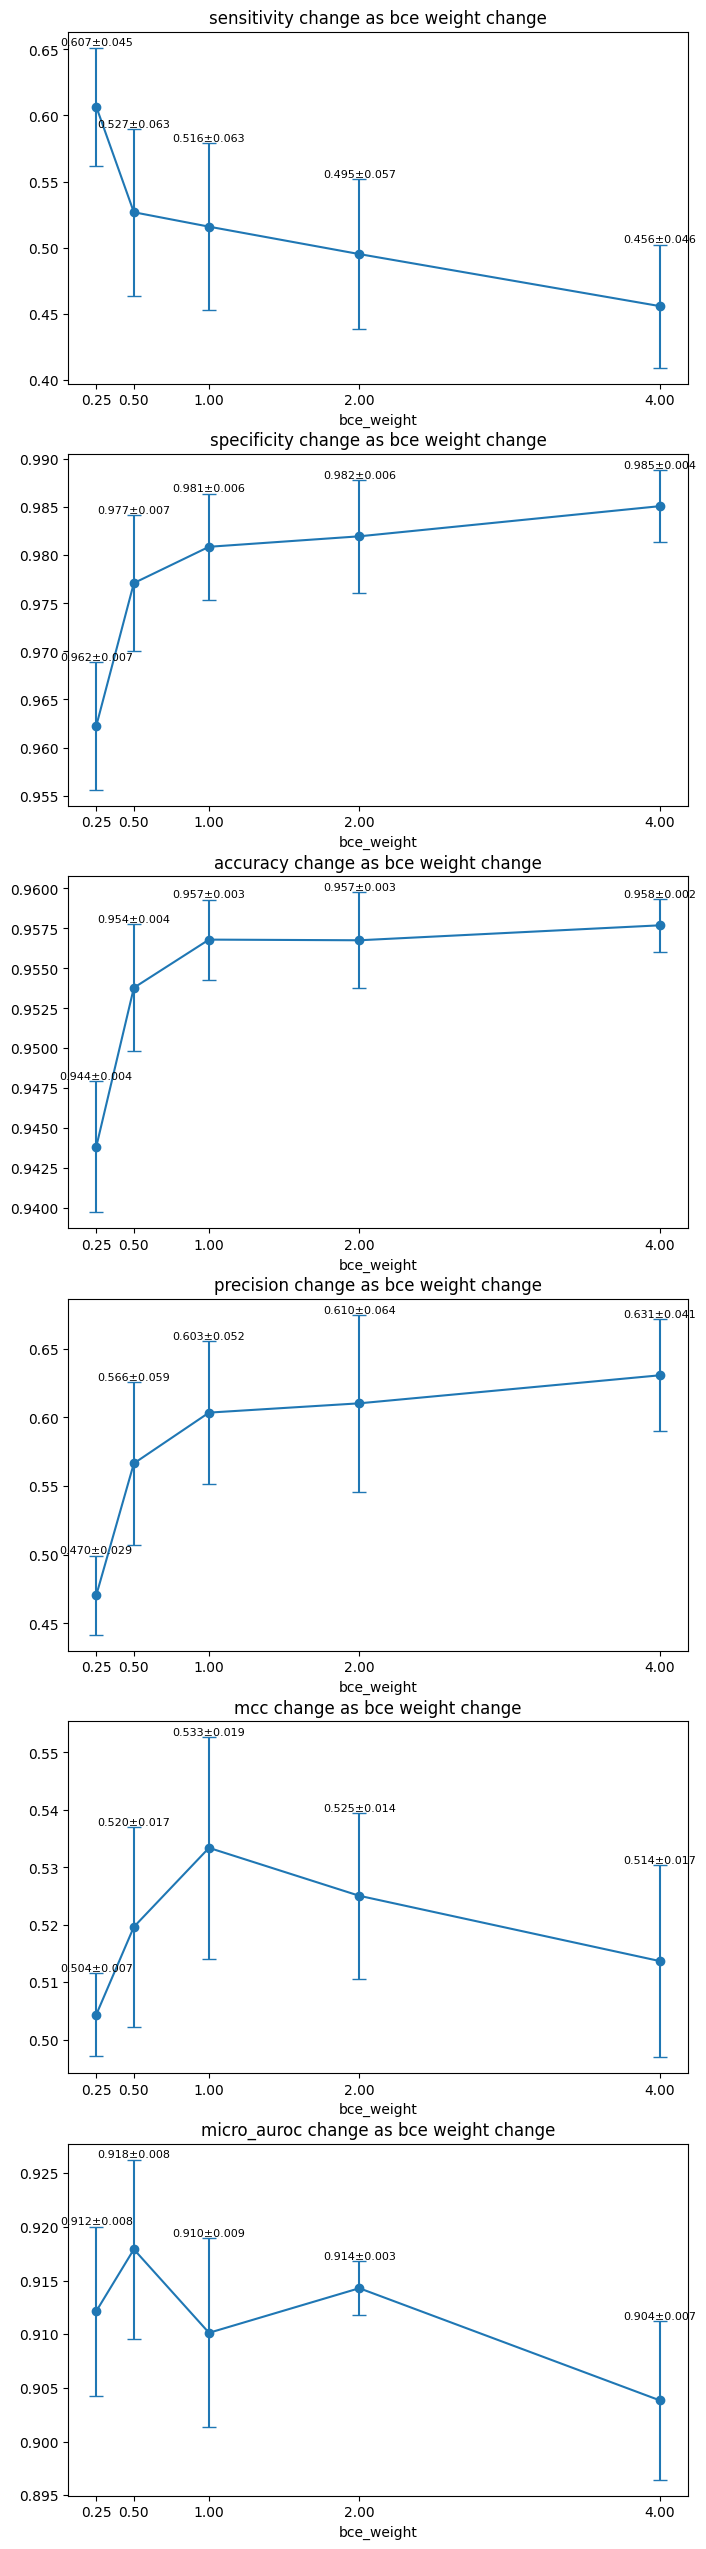

In [27]:
import matplotlib.pyplot as plt

bce_weights = [i['parameters']['bce_weight'] for i in data]

metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(6, figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in result]
    metric_std = [i['statistics'][metric][1] for i in result]
    print(metric_avg)
    print(metric_std)
    ax.errorbar(bce_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as bce weight change')
    ax.set_xlabel('bce_weight')
    ax.set_xticks(bce_weights)

    for weight, avg, std in zip(bce_weights, metric_avg, metric_std):
        ax.text(weight, avg+std, f'{avg:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=8)